In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
    
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=40)
mpl.rc('xtick', labelsize=20)
mpl.rc('ytick', labelsize=20)

# Where to save the figures
PROJECT_ROOT_DIR = "."
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, fig_id + ".png") 
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

import pandas as pd

def plot_img(data):
    plt.imshow(data, cmap = "gray",interpolation="nearest")
    plt.axis("off")
    
import seaborn as sns


In [2]:
#data = pd.read_pickle('final_data')
#data = pd.read_pickle('final_data_augmented_2')
data = pd.read_pickle('final_data_img_no_preprocessed')

print("Number of rows in data =",data.shape[0])
print("Number of columns in data =",data.shape[1])
print("\n")
print("**Sample data:**")
data['tsne_imgs'] = data['tsne_imgs'].apply(np.ravel)
data['images_red_pca'] = data['images_red_pca'].apply(np.ravel)
data.head()



Number of rows in data = 330
Number of columns in data = 7


**Sample data:**


,tissue,abnormality,severity,radius_of_anormality,images,images_red_pca,tsne_imgs
id,,,,,,,
mdb001,2,3,0,197.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1856.997104142061, -593.0463311779507, -58.76...","[26.682732696702573, -12.617882278603377, -28...."
mdb002,2,3,0,69.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1111.287717924491, 1488.2383065726756, 830.33...","[-21.012348590995884, 12.174757770665591, -21...."
mdb003,0,5,2,-99999.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[-714.8415995397945, 980.3099589148345, 1588.8...","[-9.462850278535003, 19.914231049654624, -12.3..."
mdb004,0,5,2,-99999.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[2101.46896962869, -1386.7266064525736, -130.1...","[10.189734503403798, 33.271325305346636, 10.24..."
mdb005,1,3,0,30.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[508.4129705830418, 1963.7231552374446, 1050.0...","[3.7929075627512217, 31.827571780049805, -2.26..."


In [98]:
print('b',(data['severity'] ==0).value_counts())
print('m',(data['severity'] ==1).value_counts())
print('n',(data['severity'] ==2).value_counts())

b False    261
True      69
Name: severity, dtype: int64
m False    276
True      54
Name: severity, dtype: int64
n True     207
False    123
Name: severity, dtype: int64


In [5]:
x_t = np.array(data['tsne_imgs'].apply(np.ravel))
y = np.array(data['severity'])

X = np.array([x for x in x_t])
X.shape, y.shape

((330, 2048), (330,))

In [ ]:
from sklearn.feature_selection import mutual_info_classif

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

max_score = 0
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

lr = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
             metric_params=None, n_jobs=-1, n_neighbors=15, p=2,
             weights='distance')

for i in range(0, X.shape[1]):
    # Feature selection
    select = SelectKBest(f_classif, k=i+1)
    select.fit(X, y)  # Computes the statistical relationship between the features and the output
    X_selected = select.transform(X)  # Reduces the number of features to k

    #test split
    X_train, x_test, y_train, y_test = train_test_split(X_selected, y,test_size=0.20, random_state=42 )

    lr.fit(X_selected, y)
    strat_kfold = StratifiedKFold(10, random_state=7)
    score = cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=strat_kfold, n_jobs=-1)
    print('CV score: %.3f +/- %.3f' % (np.mean(score), np.std(score)))

    # Optimal number of features
    if np.mean(score) > max_score:
        max_score = np.mean(score)
        best_n_features = i
        mask = select.get_support(indices=True)

print('\nThe optimal number of features is: %i' % best_n_features)
print('The maximum score is: %.3f' % max_score)
print('The optimal features are: ', mask)


In [99]:
#data['severity'] = data['severity'].replace(0,1)  #for 2 labels

In [4]:
x_1 = np.array(data['tissue'])
x_2 = np.array(data['abnormality'])
x_3 = np.array(data['radius_of_anormality'])
x_t = data['tsne_imgs'].apply(np.ravel)
#x_t = data['images'].apply(np.ravel)

y = np.array(data['severity'])

X = np.column_stack((x_1,x_2,x_3, [x for x in x_t]))
X.shape, y.shape

((330, 2051), (330,))

In [ ]:
#np.save('mask_ft',np.array(mask))

In [9]:

#select N features (17 after performing previous selection)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
# Create an SelectKBest object to select features with two best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=17)

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(X, y)
#mask = X_kbest.get_support(indices=True)
#mask


In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


In [10]:
X_train, x_test, y_train, y_test = train_test_split(X_kbest, y,test_size=0.20, random_state=42 )
#X_train, x_test, y_train, y_test = train_test_split(X[:,mask], y,test_size=0.20, random_state=42)  #use the indices of top features
X_train.shape, x_test.shape, y_train.shape, y_test.shape

((264, 17), (66, 17), (264,), (66,))

In [12]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

In [50]:

from sklearn import neighbors
param_distribs = {
        'n_neighbors': [3,5,8,11,15],
        'weights': ['uniform','distance'],
        'metric': ['euclidean', 'manhattan','minkowski'],
    }

knn_reg = neighbors.KNeighborsClassifier()
knn_search = RandomizedSearchCV(knn_reg, param_distributions=param_distribs,
                                n_iter=20, cv=5, verbose=0, n_jobs=-1, random_state=7)
knn_search.fit(X_train, y_train)
print(knn_search.score(x_test,y_test))
knn_search.best_estimator_

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'n_neighbors': [3, 5, 8, 11, 15], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']},
          pre_dispatch='2*n_jobs', random_state=7, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

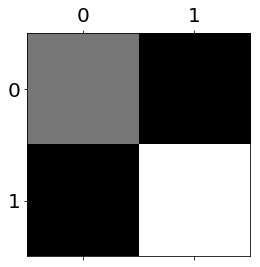

[[21  0]
 [ 0 45]]
              precision    recall  f1-score   support

           M       1.00      1.00      1.00        21
           N       1.00      1.00      1.00        45

   micro avg       1.00      1.00      1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



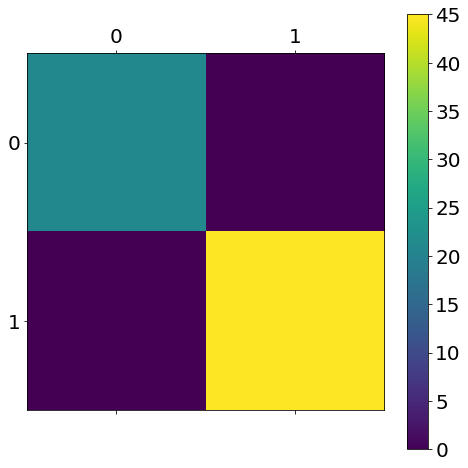

In [54]:

y_train_pred = cross_val_predict(knn_search.best_estimator_, x_test, y_test, cv=10)
conf_mx = confusion_matrix(y_test, y_train_pred)

plt.matshow(conf_mx, cmap=plt.cm.gray)
#save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

plot_confusion_matrix(conf_mx)

print(conf_mx)

from sklearn.metrics import classification_report

#target_names = ['B','M','N']
target_names = ['M','N']
print(classification_report(y_test, y_train_pred, target_names=target_names))



In [73]:
from sklearn.ensemble import RandomForestClassifierr
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.multiclass import OneVsOneClassifier

#ovo_clf = OneVsOneClassifier(forest_clf.best_estimator_)
ovo_clf = OneVsOneClassifier(ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',  max_depth=None,
                            max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None,  min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1, oob_score=False,
                            random_state=7, verbose=0, warm_start=False))

ovo_clf.fit(X_train, y_train)
ovo_clf.score(x_test, y_test)


/home/jer/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9848484848484849

/home/jer/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/jer/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/jer/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/jer/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/jer/.local/lib/python3.7/site-packages/sklearn/ensemble/forest

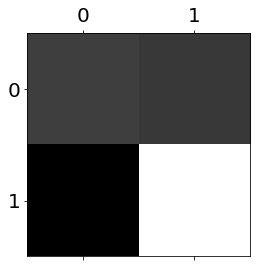

[[11 10]
 [ 0 45]]
              precision    recall  f1-score   support

           C       1.00      0.52      0.69        21
           N       0.82      1.00      0.90        45

   micro avg       0.85      0.85      0.85        66
   macro avg       0.91      0.76      0.79        66
weighted avg       0.88      0.85      0.83        66



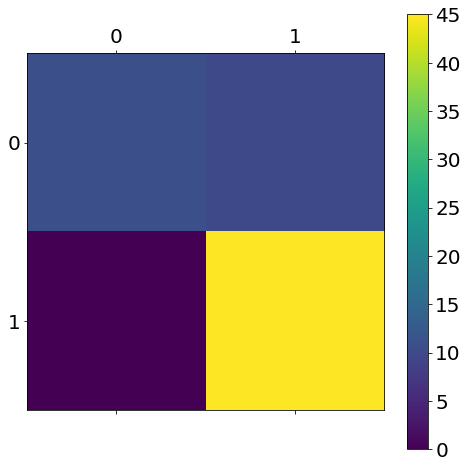

In [74]:
y_train_pred = cross_val_predict(ovo_clf, x_test, y_test, cv=10)
conf_mx = confusion_matrix(y_test, y_train_pred)

plt.matshow(conf_mx, cmap=plt.cm.gray)
#save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

plot_confusion_matrix(conf_mx)

print(conf_mx)

from sklearn.metrics import classification_report

target_names = ['C','N']
#target_names = ['B','M','N']
print(classification_report(y_test, y_train_pred, target_names=target_names))



In [56]:
from sklearn.ensemble import RandomForestClassifier

param_distribs = {
        'criterion': ['gini','entropy'],
        'max_features': ['auto','sqrt','log2',None],
        'bootstrap': [True, False],
    }

forest_clf = RandomForestClassifier(n_estimators=10, verbose=0,random_state= 7)
forest_clf = RandomizedSearchCV(forest_clf, param_distributions=param_distribs, 
                                n_iter=20, cv=3, verbose=0, n_jobs=-1, random_state=7)
forest_clf.fit(X_train, y_train)


/home/jer/.local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=7, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2', None], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=7, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [27]:
forest_clf.best_estimator_.score(x_test, y_test)

0.8939393939393939

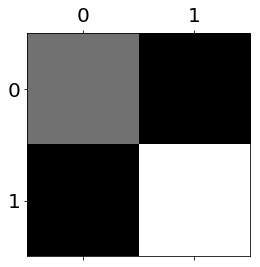

[[20  1]
 [ 1 44]]
              precision    recall  f1-score   support

           C       0.95      0.95      0.95        21
           N       0.98      0.98      0.98        45

   micro avg       0.97      0.97      0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



In [58]:
y_train_pred = cross_val_predict(forest_clf.best_estimator_, x_test, y_test, cv=10)
conf_mx = confusion_matrix(y_test, y_train_pred)

plt.matshow(conf_mx, cmap=plt.cm.gray)
#save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

#plot_confusion_matrix(conf_mx)

print(conf_mx)

from sklearn.metrics import classification_report

#target_names = ['B','M','N']
target_names = ['C','N']
print(classification_report(y_test, y_train_pred, target_names=target_names))



In [16]:
#SVC
from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train, y_train)
svc.score(x_test, y_test)

/home/jer/.local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6818181818181818

/home/jer/.local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jer/.local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jer/.local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jer/.local/lib/python3.7/site-packages/sklearn/svm/base.py:196: Fut

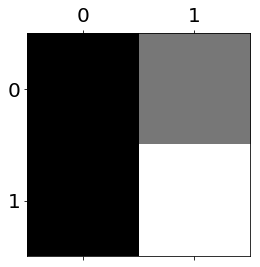

[[ 0 21]
 [ 0 45]]
              precision    recall  f1-score   support

           C       0.00      0.00      0.00        21
           N       0.68      1.00      0.81        45

   micro avg       0.68      0.68      0.68        66
   macro avg       0.34      0.50      0.41        66
weighted avg       0.46      0.68      0.55        66



/home/jer/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jer/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jer/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [76]:
y_train_pred = cross_val_predict(svc, x_test, y_test, cv=10)
conf_mx = confusion_matrix(y_test, y_train_pred)

plt.matshow(conf_mx, cmap=plt.cm.gray)
#save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

#plot_confusion_matrix(conf_mx)

print(conf_mx)

from sklearn.metrics import classification_report

#target_names = ['B','M','N']
target_names = ['C','N']
print(classification_report(y_test, y_train_pred, target_names=target_names))



In [82]:
#
from sklearn.ensemble import ExtraTreesClassifier

mlp = ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',  max_depth=None,
                            max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None,  min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1, oob_score=False,
                            random_state=7, verbose=0, warm_start=False)

mlp.fit(X_train, y_train)
mlp.score(x_test, y_test)

/home/jer/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.0

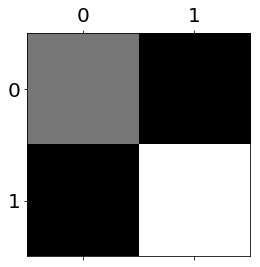

[[21  0]
 [ 0 45]]
              precision    recall  f1-score   support

           M       1.00      1.00      1.00        21
           N       1.00      1.00      1.00        45

   micro avg       1.00      1.00      1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



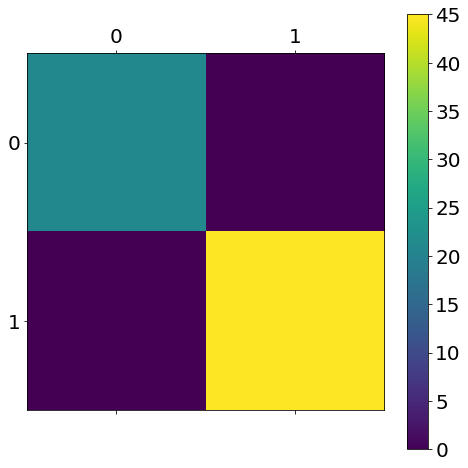

In [84]:
y_train_pred = cross_val_predict(mlp, x_test, y_test, cv=10)
conf_mx = confusion_matrix(y_test, y_train_pred)

plt.matshow(conf_mx, cmap=plt.cm.gray)
#save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

plot_confusion_matrix(conf_mx)

print(conf_mx)

from sklearn.metrics import classification_report

target_names = ['M','N']
#target_names = ['B','M','N']
print(classification_report(y_test, y_train_pred, target_names=target_names))

